<a href="https://colab.research.google.com/github/eunhyechoe/psyc60/blob/main/2_ISC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **2. Intersubject Correlation (ISC) Analysis**


#### 1. Setup environment and import libraries/data

In [1]:
%%capture
%pip install -U neuroboros hyperalignment

In [2]:
# import libraries
import numpy as np
import neuroboros as nb
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist
from scipy.stats import pearsonr, zscore

TypeError: 

In [ ]:
# load data
dset = nb.Forrest()
sids = dset.subjects

In [ ]:
# data for subject 1 and 2 (Python starts label with 0)
dm1 = dset.get_data(sids[0], 'forrest', 1, 'lr')
dm2 = dset.get_data(sids[1], 'forrest', 1, 'lr')

In [ ]:
print(dm1.shape, dm2.shape)

(451, 19341) (451, 19341)


In [ ]:
# number of timeseries/vertices
nt, nv = dm1.shape

In [ ]:
# compute Pearson R correlation between two subjects
isc = np.zeros((nv,))
for i in range(nv):
    isc[i] = pearsonr(dm1[:, i], dm2[:, i])[0]

<ipython-input-23-4c25b7b05f14>:3: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  isc[i] = pearsonr(dm1[:, i], dm2[:, i])[0]


In [ ]:
# or calculate z-score
isc2 = np.mean(
    zscore(dm1, axis=0) * zscore(dm2, axis=0),
    axis=0)

In [ ]:
np.testing.assert_allclose(isc, isc2)

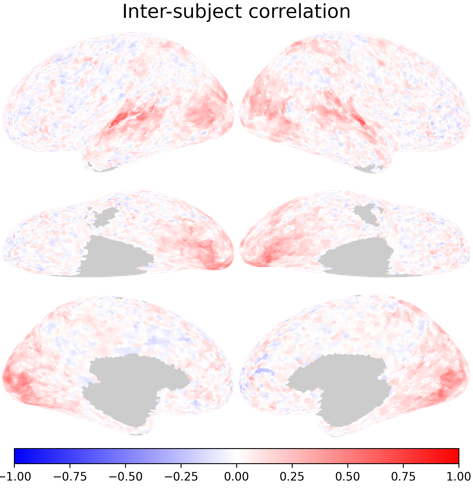

In [ ]:
nb.plot(isc,
        title='Inter-subject correlation',
        vmax=1, vmin=-1, cmap='bwr')

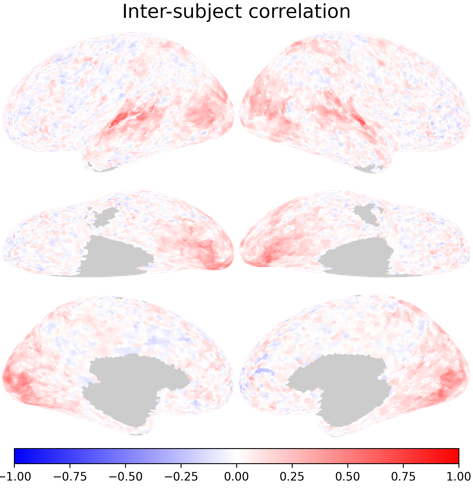

In [ ]:
nb.plot(isc2,
        title='Inter-subject correlation',
        vmax=1, vmin=-1, cmap='bwr')

In [ ]:
dms = [dset.get_data(sid, 'budapest', 1, 'lr')
       for sid in sids]
dms = np.stack(dms, axis=0)

In [ ]:
dms.shape

In [ ]:
isc_all = 1 - np.stack(
    [pdist(dms[:, :, i], 'correlation')
     for i in range(nv)],
    axis=1)
print(isc_all.shape)

avg = np.nanmean(isc_all, axis=0)

In [ ]:
nb.plot(avg,
        title='Inter-subject correlation',
        vmax=1, vmin=-1, cmap='bwr',
        width=600)